In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (1 - rho) * g * g
        p.grad.data.zero_()


loss: 0.243, 0.009 sec/epoch


([0.009879350662231445,
  0.017880678176879883,
  0.026871919631958008,
  0.03592061996459961,
  0.043366432189941406,
  0.05188465118408203,
  0.0618443489074707,
  0.06935667991638184,
  0.0787801742553711,
  0.08790397644042969,
  0.0955197811126709,
  0.10492134094238281,
  0.11192727088928223,
  0.11933565139770508,
  0.12781071662902832],
 [0.4030225557486216,
  0.35793218278884886,
  0.30364820726712544,
  0.2781563350756963,
  0.2598043472766876,
  0.25222261794408163,
  0.24650823807716368,
  0.2440693273941676,
  0.2470175467332204,
  0.24384816499551137,
  0.24413887683550517,
  0.24645719468593597,
  0.24331791814168294,
  0.24479952667156854,
  0.24293057662248613])

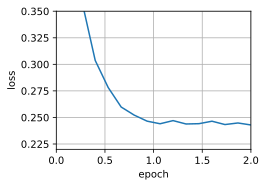

In [2]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim),
               {'rho': 0.9}, data_iter, feature_dim)


loss: 0.243, 0.009 sec/epoch


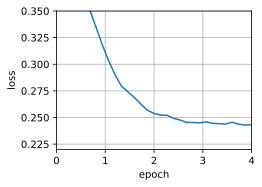

In [3]:
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)
